# Atlanta United's inaugural season performance 

In [171]:
import pandas as pd
import csv
import urllib
import matplotlib.pyplot as plt
import numpy as np
import seaborn

As a *HUGE* soccer fan, I was beyond excited when I heard Atlanta United would be joining the MLS in 2017. I grew up in a city that was famous for its soccer, and I've been watching soccer on a regular basis. Now the season is over (at least for ATLUTD), I would like to examine how they did compare to historic data and other expansion teams as well as if Atlanta United benefited from the so-called "Home Advantage".

### 2016 Season

First, I'd like to examine the 2016 Major League Soccer season, prior to Atlanta United joining the league. I personally don't like how the teams are divided into West and East conferences as none of the other major soccer leagues have such practices. Thus, we will focus on the number of goals scored/conceded by each team. The data for 2016 (and previous seasons but for the purpose of this experiment, I'm going to extract data that are only for 2016) is from https://github.com/jalapic/engsoccerdata/blob/master/data-raw/mls.csv 

In [172]:
#Clean up the data
mls = pd.read_csv("https://raw.githubusercontent.com/jalapic/engsoccerdata/master/data-raw/mls.csv")
mls16=mls.loc[mls['Season'] == 2016]
mls = mls16[['home','visitor','hgoal','vgoal']]
mls = mls.rename(columns={'home': 'Home', 'visitor': 'Away', 'hgoal': 'HomeGoals', 'vgoal': 'AwayGoals'})
mls.head()
#Look at the shape of the data
mls.shape

(357, 4)

I imported a csv as pandas dataframe, which contains various information for each of the 357 MLS games in the 2016 season (regular and post season games). We are not going to omit the post-season ones for now as it doesn't affect the result much. We restrict the dataframes to the columns in which we are interested (specifically, team names and numer of goals scored by each team)

In [20]:
#Calculate the average of home goals and away goals
table=mls.mean()
table

HomeGoals    1.680672
AwayGoals    1.131653
dtype: float64

"Home Advantage" is the phenomenon that can be observed in many sports (as discussed here: http://bleacherreport.com/articles/1803416-is-home-field-advantage-as-important-in-baseball-as-other-major-sports). As a soccer fan, I can say home advantage definitely holds true. And we are able to see here that statistically the home team scores more than the away team. (1.68 vs 1.13 per game)

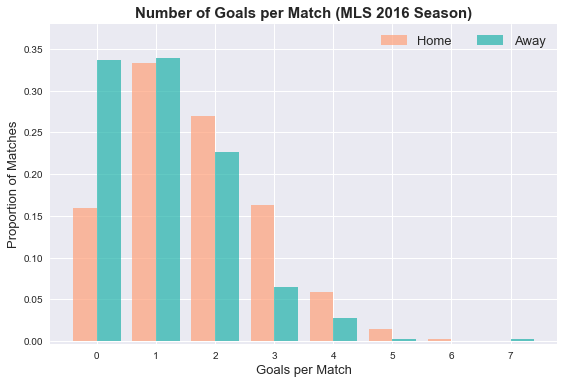

In [5]:
# plot histogram of goals
plt.hist(mls[['HomeGoals', 'AwayGoals']].values, range(9), 
         alpha=0.7, label=['Home', 'Away'],normed=True, color=["#FFA07A", "#20B2AA"])

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)

plt.xlabel("Goals per Match",size=13)
plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (MLS 2016 Season)",size=15,fontweight='bold')
plt.ylim([-0.004, 0.38])
plt.tight_layout()
plt.show()

We could see from the graph that 0, 1 and 2 goals per match are the most common for the 2016 season. The away team has double the chances of not scoring compare to the home teams, which again suggest the existence of home advantage. We can also tell from the graph that the home teams are most likely to score 1 or 2 goals in a match, while the away teams are most likely to score 0 or 1 goal. The graph also shows right skewness, and given the nature of soccer, it makes sense that why we would observe such distribution of goals. It is rare to see more 5 or more goals in a match. 

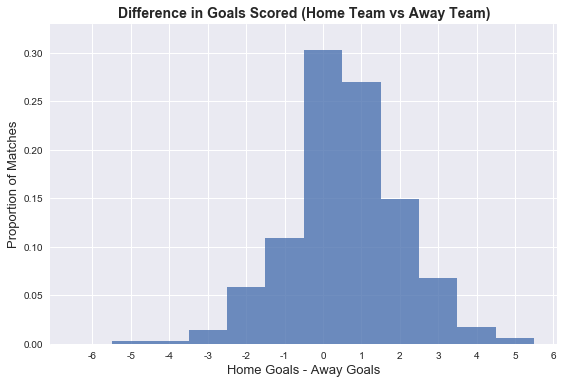

In [6]:
# plot histogram of difference in goals
plt.hist(mls[['HomeGoals']].values - mls[['AwayGoals']].values, range(-6,7), 
         alpha=0.8,normed=True)
plt.xticks([i+0.5 for i in range(-6,7)],[i for i in range(-6,7)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.001, 0.33])
plt.tight_layout()
plt.show()

From this graph, we can see tell that the most common scenartio in 2016 season is a draw (e.g. 0-0, 1-1, etc). We can observe the home advantage from this graph too as more games have positive differences of goals (home team scored more goals than away teams), than negative differences of goals (home team scored less goals than away teams).

### 2017 Season

After doing some anaylsis of the previous season, now let's take a look at the 2017 season, which isn't technically over yet, but the journey of Atlanta United has come to an end. It's a good time to analyze how Atlanta United did in their inaugural season. 

In [55]:
df = pd.read_html("http://www.americansocceranalysis.com/by-game-2017/")[0]
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0))
mls1 = df.rename(columns={'HG': 'HomeGoals', 'AG': 'AwayGoals'})
mls1=mls1.iloc[::-1]
mls1.head()

,Date,Home,HomeGoals,HxG,Away,AwayGoals,AxG,GD,xGD
374,3/4/2017,Colorado,1,0.77,New England,0,0.52,1,0.25
373,3/4/2017,Salt Lake,0,1.77,Toronto,0,1.35,0,0.42
372,3/4/2017,L.A. Galaxy,1,1.64,FC Dallas,2,0.58,-1,1.06
371,3/4/2017,Columbus,1,1.44,Chicago,1,1.14,0,0.3
370,3/4/2017,Portland,5,2.54,Minnesota United,1,0.58,4,1.96


This table includes more information that we can utilize: HxG means Home Expected Goals; AxG means Away Expected Goals; and xGD means Expected Goal Differential. The way that the number is calculated can be found here: http://www.americansocceranalysis.com/explanation/. 
And again the table includes home team and away team, and the number of goals they scored. 

In [56]:
mls1.shape

(374, 9)

Since there are two new teams added to the MLS in the 2017 season (Atlanta United and Minnesota United FC), more teams were played and 374 doesn't include the post season games (More data to play with! Fun!)

In [57]:
#Change the type first...
mls1['HomeGoals'] = mls1['HomeGoals'].astype(str).astype(int)
mls1['AwayGoals'] = mls1['AwayGoals'].astype(str).astype(int)
mls1['GD'] = mls1['GD'].astype(str).astype(int)
mls1['HxG'] = mls1['HxG'].astype(float)
mls1['AxG'] = mls1['AxG'].astype(float)
mls1['xGD'] = mls1['xGD'].astype(float)
mls1.dtypes

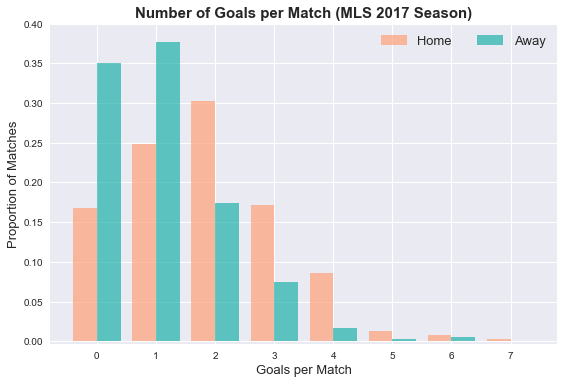

In [178]:
# plot histogram of goals
plt.hist(mls1[['HomeGoals', 'AwayGoals']].values, range(9), 
         alpha=0.7, label=['Home', 'Away'],normed=True, color=["#FFA07A", "#20B2AA"])

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)

plt.xlabel("Goals per Match",size=13)
plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (MLS 2017 Season)",size=15,fontweight='bold')
plt.ylim([-0.004, 0.40])
plt.tight_layout()
plt.show()

The general distribution is very similar to the 2016 season. Compare to last season, away teams are even more likely to score no goal or 1 goals. Let's take a look at the numbers and see if it's true. 

In [188]:
#Again, let's check if home advantage holds true
table1=mls1.mean()
table1
#It's true! 

0
HomeGoals    1.842246
HxG          1.645615
AwayGoals    1.058824
AxG          1.152326
GD           0.783422
xGD          0.493209
dtype: float64

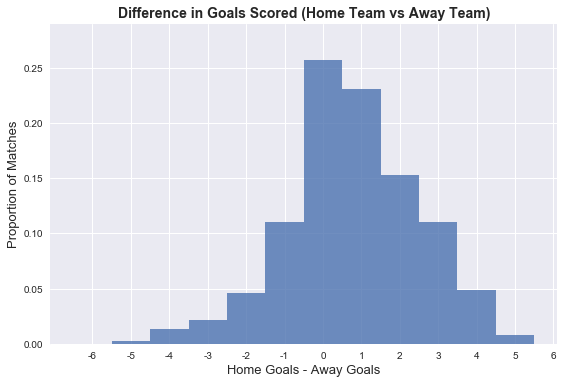

In [181]:
# plot histogram of difference in goals
plt.hist(mls1[['HomeGoals']].values - mls1[['AwayGoals']].values, range(-6,7), 
         alpha=0.8,normed=True)
plt.xticks([i+0.5 for i in range(-6,7)],[i for i in range(-6,7)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.001, 0.29])
plt.tight_layout()
plt.show()

The general distribution is similar to the 2016 season: difference between home goals and away goals is 0 or 1 is mostly observed. But the proportion of draws decreased and there are more games that ended with win/loss scenario. 

Let's put the 2016 league average and 2017 average side by side to compare

In [116]:
#2016 league average vs 2017 league average
result=pd.concat([table, table1], axis=1, join='inner')
result.columns = ['2016', '2017']
result

,2016,2017
HomeGoals,1.680672,1.842246
AwayGoals,1.131653,1.058824


It's easy to see the home advantage (1.84 vs. 1.05), and the margin grew greater compared to the 2016 season. This is quite interesting and maybe Atlanta United's home performance contributed to this effect? 

In [189]:
#Atlanta United home performance
atlh=mls1.loc[mls1['Home'] == 'Atlanta United']
#Compare Atlanta United average number of home goals with league average
atlhome=atlh.mean()
atlhome

atlhvsleague= pd.concat([atlhome, table1], axis=1)
atlhvsleague.columns = ['ATL Home', 'MLS Average']
atlhvsleague

,ATL Home,MLS Average
0,,
HomeGoals,2.764706,1.842246
HxG,1.875882,1.645615
AwayGoals,1.000000,1.058824
AxG,0.957647,1.152326
GD,1.764706,0.783422
xGD,0.919412,0.493209


Atlanta United did a really good job at scoring at home (2.76 vs league average of 1.84). The GD (goal difference) is 1.76, close to 2 goals which means Atlanta United wins by big margin when at home. There are many random factors that can affect a team's performance, but Atlanta United clearly benefited from the home advantage. 
Now we will see if Atlanta United performed well on away games too. 

In [190]:
#Atlanta United away performance
atla=mls1.loc[mls1['Away'] == 'Atlanta United']
#Compare Atlanta United average number of away goals with league average
atlaway=atla.mean()
atlaway

atlavsleague= pd.concat([atlaway, table1], axis=1)
atlavsleague.columns = ['ATL Away', 'MLS Average']
atlavsleague

,ATL Away,MLS Average
0,,
HomeGoals,1.176471,1.842246
HxG,1.666471,1.645615
AwayGoals,1.294118,1.058824
AxG,0.965882,1.152326
GD,-0.117647,0.783422
xGD,0.700000,0.493209


Atlanta United outperformed league average on away games as well (1.29 vs league average 1.05). The predicted model was off by quite a lot as Atlanta United definitely performed way much better than a lot of people assumed (including me!). They landed 4th place in the Eastern Conference (out of 11 teams), which was a big (but pleasant) surprise for all of us. 

In [173]:
#Put them together
result1 = pd.concat([atlhome, atlaway], axis=1)
result1.columns = ['ATL Home', 'ATL Away']
result1

,ATL Home,ATL Away
0,,
HomeGoals,2.764706,1.176471
HxG,1.875882,1.666471
AwayGoals,1.000000,1.294118
AxG,0.957647,0.965882
GD,1.764706,-0.117647
xGD,0.919412,0.700000


There's another team that joined the MLS in 2017, Minnesota United FC. I'm interested in finding out if they performed well, and if they benefited from home advantage. Maybe Atlanta United's success was beginner's luck. Let's find out by comparing the two teams. 

In [123]:
#Minnesota United home performance
minh=mls1.loc[mls1['Home'] == 'Minnesota United']
#Compare Minnesota United average number of home goals with Atlanta United and MLS average 
minhome = minh.mean()
table3 =pd.concat([atlhome, minhome, table1], axis=1)
table3.columns = ['ATL Home', 'MIN Home', 'MLS average']
table3

,ATL Home,MIN Home,MLS average
0,,,
HomeGoals,2.764706,1.352941,1.842246
HxG,1.875882,1.229412,1.645615
AwayGoals,1.000000,1.411765,1.058824
AxG,0.957647,1.685882,1.152326
GD,1.764706,-0.058824,0.783422
xGD,0.919412,-0.455294,0.493209


Minnesota United only scored half of the number of home goals that Atlanta scored! (1.35 vs 2.76) Clearly it's not a team as good as Atlanta United, and it doesn't seem to benefited from home advantage. The average number of their home goals is also lower than league average, which could explain why they ended up 9th in the Western conference (out of 11 teams). 
They also conceded more goals than ATL and MLS average (1.41 vs 1 vs 1.05). 
Let's take a look at their away performances.

In [174]:
#Minnesota United away performance
mina=mls1.loc[mls1['Away'] == 'Minnesota United']
#Compare Minnesota United average number of away goals with Atlanta United and MLS average 
minaway=mina.mean()
table4 = pd.concat([atlaway, minaway, table1], axis=1)
table4.columns= ['ATL Away', 'MIN Away', 'MLS average']
table4

,ATL Away,MIN Away,MLS average
0,,,
HomeGoals,1.176471,2.529412,1.842246
HxG,1.666471,2.215294,1.645615
AwayGoals,1.294118,1.294118,1.058824
AxG,0.965882,1.037059,1.152326
GD,-0.117647,1.235294,0.783422
xGD,0.700000,1.178235,0.493209


Minnesota's away performance is on par with their home performance (which actually beats the league average). Minnesota scored same number of away goals as Atlanta (the average AwayGoals is the same). Which means Atlanta United needs to do better next season at away games! (And hopefully continue hold on to the home advantage)
Another reason Minnesota didn't do so well is because they conceded too many goals at away games (2.52 vs 1.17 vs 1.84). 

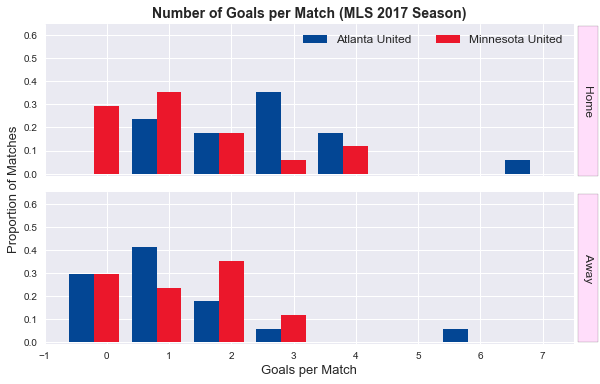

In [176]:
#The distribution of goals scored by Atlanta United and Minnesota United. Credit to https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-06-04-predicting-football-results-with-statistical-modelling.ipynb
fig,(ax1,ax2) = plt.subplots(2, 1)
atl_home = mls1[mls1['Home']=='Atlanta United'][['HomeGoals']].apply(pd.value_counts,normalize=True)
min_home = mls1[mls1['Home']=='Minnesota United'][['HomeGoals']].apply(pd.value_counts,normalize=True)

atl_away = mls1[mls1['Away']=='Atlanta United'][['AwayGoals']].apply(pd.value_counts,normalize=True)
min_away = mls1[mls1['Away']=='Minnesota United'][['AwayGoals']].apply(pd.value_counts,normalize=True)

ax1.bar(atl_home.index-0.4,atl_home.values,width=0.4,color="#034694",label="Atlanta United")
ax1.bar(min_home.index,min_home.values,width=0.4,color="#EB172B",label="Minnesota United")


leg=ax1.legend(loc='upper right', fontsize=12, ncol=2)
ax1.set_xlim([-1,7.5])
ax1.set_ylim([-0.01,0.65])
ax1.set_xticklabels([])
# mimicing the facet plots in ggplot2 with a bit of a hack
ax1.text(7.65, 0.585, '                Home                ', rotation=-90,
        bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})
ax2.text(7.65, 0.585, '                Away                ', rotation=-90,
        bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})

ax2.bar(atl_away.index-0.4,atl_away.values,width=0.4,color="#034694",label="Atlanta United")
ax2.bar(min_away.index,min_away.values,width=0.4,color="#EB172B",label="Minnesota United")

ax2.set_xlim([-1,7.5])
ax2.set_ylim([-0.01,0.65])
ax1.set_title("Number of Goals per Match (MLS 2017 Season)",size=14,fontweight='bold')
ax2.set_xlabel("Goals per Match",size=13)
ax2.text(-1.6, 0.9, 'Proportion of Matches', rotation=90, size=13)
plt.tight_layout()
plt.show()

The visualization helps us to identify where Atlanta is outperforming Minnesota: The two short blue bars indicate Atlanta has the ability to score many goals (The top striker, Josef Martinez, scored 19 goals which ranked 4th out of all the players), and also scores at least one goal when at home. 

### Conclusion

Through the analysis, we were able to interpret Atlanta United's amazing inaugural season performance from a statistical perspective. And we are able to conclude that in general, home advantage holds true, and Atlanta United benefited from home advantage. When comparing to the other expansion team, Atlanta had an edge over the other team, but we were also able to identify some areas that Atlanta could improve in the next season. 
Just like any other sport, soccer can be very unpredictive at times, and new teams joining the league is a huge random factor. I personally think data cannot explain everything that contribute to a team's success, and there needs to be more analysis around other aspects of a sports team. This is a good start!

This project is made possible thanks to:
https://www.jokecamp.com/blog/guide-to-football-and-soccer-data-and-apis/
https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-06-04-predicting-football-results-with-statistical-modelling.ipynb
https://github.com/jalapic/engsoccerdata/blob/master/data-raw/mls.csv
http://www.americansocceranalysis.com/by-game-2017/
https://www.datacamp.com/community/data-science-cheatsheets?page=2&tag=python